# Feature Extraction  -- Lab#2

In [1]:
import pandas as pd

df = pd.read_csv('ecommerceData.csv')
df

C:\Users\tafre\AppData\Local\Temp\ipykernel_9488\9803741.py:3: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ecommerceData.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
print(df)

          item_id          status created_at  \
0        211131.0        complete   7/1/2016   
1        211133.0        canceled   7/1/2016   
2        211134.0        canceled   7/1/2016   
3        211135.0        complete   7/1/2016   
4        211136.0  order_refunded   7/1/2016   
...           ...             ...        ...   
1048570       NaN             NaN        NaN   
1048571       NaN             NaN        NaN   
1048572       NaN             NaN        NaN   
1048573       NaN             NaN        NaN   
1048574       NaN             NaN        NaN   

                                                       sku   price  \
0                                        kreations_YI 06-L  1950.0   
1        kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                       Ego_UP0017-999-MR0  2450.0   
3                                           kcc_krone deal   360.0   
4                                              BK7010400AG   555.0   
...

Selecting Features

In [5]:
data = df[['item_id','status','created_at','price','qty_ordered','grand_total','category_name_1',
           'payment_method','Year','Month','Customer ID']]

In [6]:
data.rename(index=str, columns={'category_name_1': 'category',
                              'Year' : 'year',
                              'Month' : 'month',
                              'Customer ID' : 'customer_id'
                              }, inplace=True)

C:\Users\tafre\AppData\Local\Temp\ipykernel_9488\4234345597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(index=str, columns={'category_name_1': 'category',


In [7]:
data = data[['item_id','customer_id','created_at','price','qty_ordered','grand_total','category','status','payment_method','month','year']]

In [8]:
data

,item_id,customer_id,created_at,price,qty_ordered,grand_total,category,status,payment_method,month,year
0,211131.0,1.0,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,complete,cod,7.0,2016.0
1,211133.0,2.0,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,canceled,cod,7.0,2016.0
2,211134.0,3.0,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,canceled,cod,7.0,2016.0
3,211135.0,4.0,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,complete,cod,7.0,2016.0
4,211136.0,5.0,7/1/2016,555.0,2.0,1110.0,Soghaat,order_refunded,cod,7.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = data.copy()

In [10]:
df = df.dropna()

In [11]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,item_id,customer_id,created_at,price,qty_ordered,grand_total,category,status,payment_method,month,year


In [12]:
df.isnull().sum().sort_values(ascending=False)

item_id           0
customer_id       0
created_at        0
price             0
qty_ordered       0
grand_total       0
category          0
status            0
payment_method    0
month             0
year              0
dtype: int64

Feature Engineering

In [13]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [14]:
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay','jazzvoucher':'jazzwallet','internetbanking':'Payaxis','mygateway':'Payaxis','marketingexpense':'Payaxis'} 
df = df.replace({"payment_method": payment_to_replace})

In [15]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [16]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'Payaxis', 'customercredit', 'mcblite',
       'productcredit', 'financesettlement', 'jazzwallet', 'Easypay',
       'bankalfalah', 'apg'], dtype=object)

In [17]:
replace_status = {'received':'complete', 'exchange':'complete', 'paid':'complete','cod':'complete'
                  ,'payment_review':'complete','pending':'complete','processing':'complete','payment_review':'complete','refund':'order_refunded', 'pending_paypal':'order_refunded',
                  'closed':'canceled','refund':'order_refunded', 'pending_paypal':'order_refunded', 'closed':'canceled',
                 'fraud':'order_refunded', 'holded':'order_refunded'} 
df = df.replace({"status": replace_status})

In [18]:
# removing null
df = df[df['status'] != '\\N']

In [19]:
df['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

In [20]:
import numpy as np

In [21]:
data['category'] = data.category.str.lower()
df['category'] = df['category'].replace('\\N',' ')
df[df['category']==" "] = np.NaN
df['category'].fillna(method='ffill')

C:\Users\tafre\AppData\Local\Temp\ipykernel_9488\3308265394.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['category'].fillna(method='ffill')


0           Women's Fashion
1         Beauty & Grooming
2           Women's Fashion
3         Beauty & Grooming
4                   Soghaat
                ...        
584519      Women's Fashion
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category, Length: 584330, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584330 entries, 0 to 584523
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   item_id         576484 non-null  float64
 1   customer_id     576484 non-null  float64
 2   created_at      576484 non-null  object 
 3   price           576484 non-null  float64
 4   qty_ordered     576484 non-null  float64
 5   grand_total     576484 non-null  float64
 6   category        576484 non-null  object 
 7   status          576484 non-null  object 
 8   payment_method  576484 non-null  object 
 9   month           576484 non-null  float64
 10  year            576484 non-null  float64
dtypes: float64(7), object(4)
memory usage: 69.6+ MB


In [23]:
df['created_at'] = pd.to_datetime(df.created_at, format='%m/%d/%Y')

In [24]:
# descriptive statistics
df.describe().round(2)

,item_id,customer_id,created_at,price,qty_ordered,grand_total,month,year
count,576484.00,576484.00,576484,576484.00,576484.0,576484.00,576484.00,576484.00
mean,568856.43,46224.06,2017-08-11 17:21:35.386515200,6380.63,1.3,8586.74,7.15,2017.05
min,211131.00,1.00,2016-07-01 00:00:00,0.00,1.0,-1594.00,1.00,2016.00
25%,400805.75,13922.75,2017-02-09 00:00:00,360.00,1.0,952.00,4.00,2017.00
50%,572625.50,43576.50,2017-08-24 00:00:00,900.00,1.0,1986.50,7.00,2017.00
75%,741158.25,74001.25,2018-02-09 00:00:00,4053.00,1.0,6998.00,11.00,2018.00
max,905208.00,115326.00,2018-08-28 00:00:00,1012625.90,1000.0,17888000.00,12.00,2018.00
std,199132.25,34392.93,NaN,15006.89,4.0,61731.64,3.49,0.70


In [25]:
df['category'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', nan, 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

Insights
- Majority of the people order only 1 item at a time.
- Fifty percent of the time people order items with price less than or equal to Rs 900.

In [26]:
df['payment_method'].value_counts()

payment_method
cod                  268229
Easypay              127711
Payaxis               97319
jazzwallet            49416
bankalfalah           23057
customercredit         7509
apg                    1758
ublcreditcard           826
mcblite                 533
productcredit           111
financesettlement        15
Name: count, dtype: int64

In [27]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (25, 10)

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


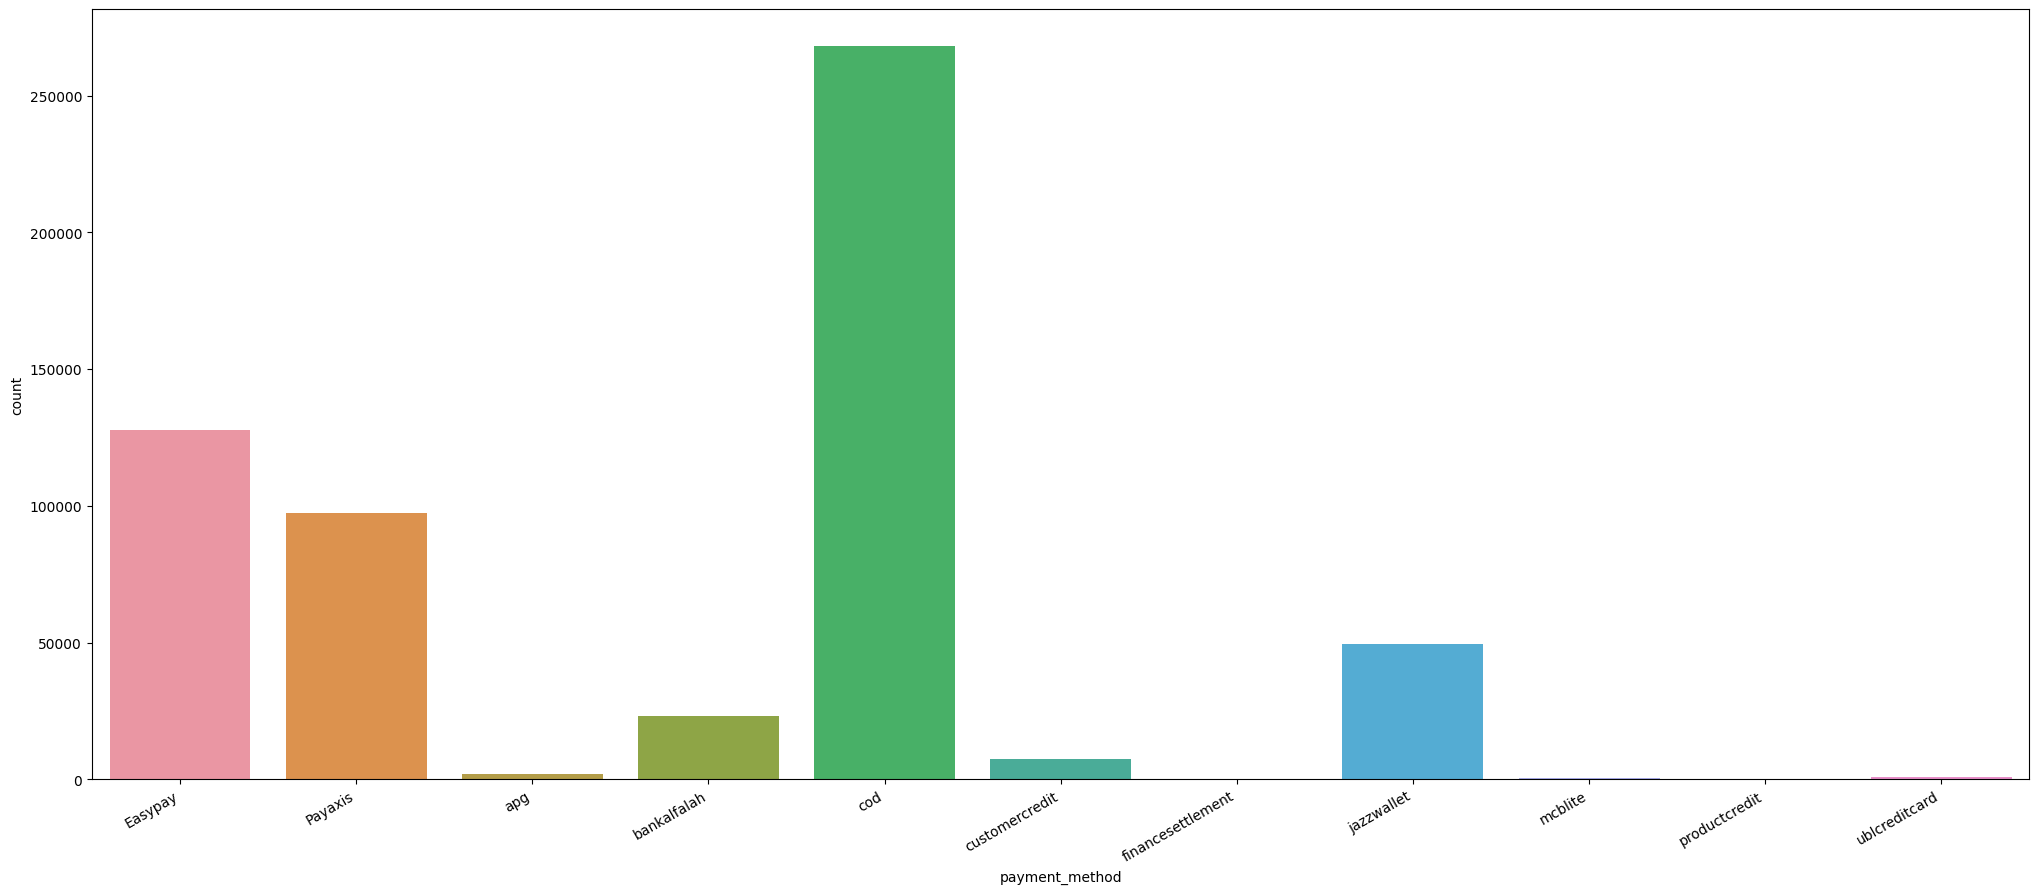

In [34]:
# Convert 'payment_method' column to categorical data type
df['payment_method'] = df['payment_method'].astype('category')

# Create the countplot
chart = sns.countplot(data=df, x='payment_method')

# Rotate the x-axis labels for better readability
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig('payment_method.png')
plt.show()

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


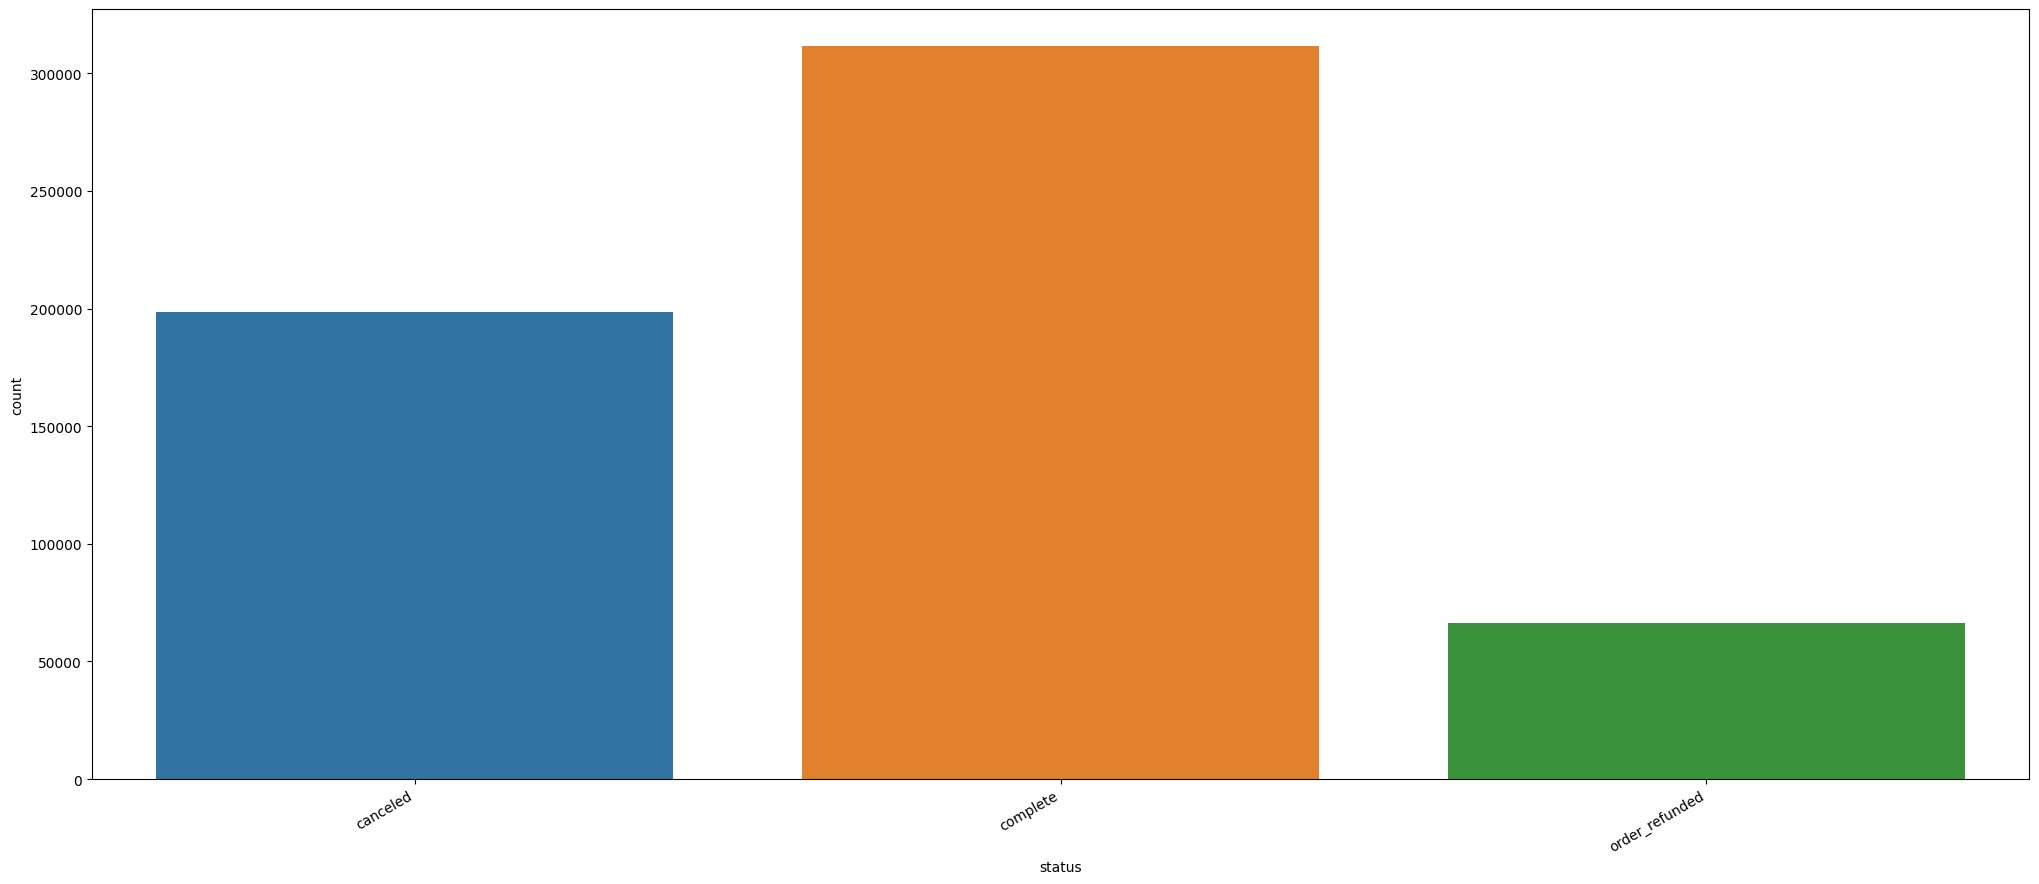

In [35]:
# Convert 'payment_method' column to categorical data type
df['status'] = df['status'].astype('category')

# Create the countplot
chart = sns.countplot(data=df, x='status')

# Rotate the x-axis labels for better readability
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig('status.png')
plt.show()

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


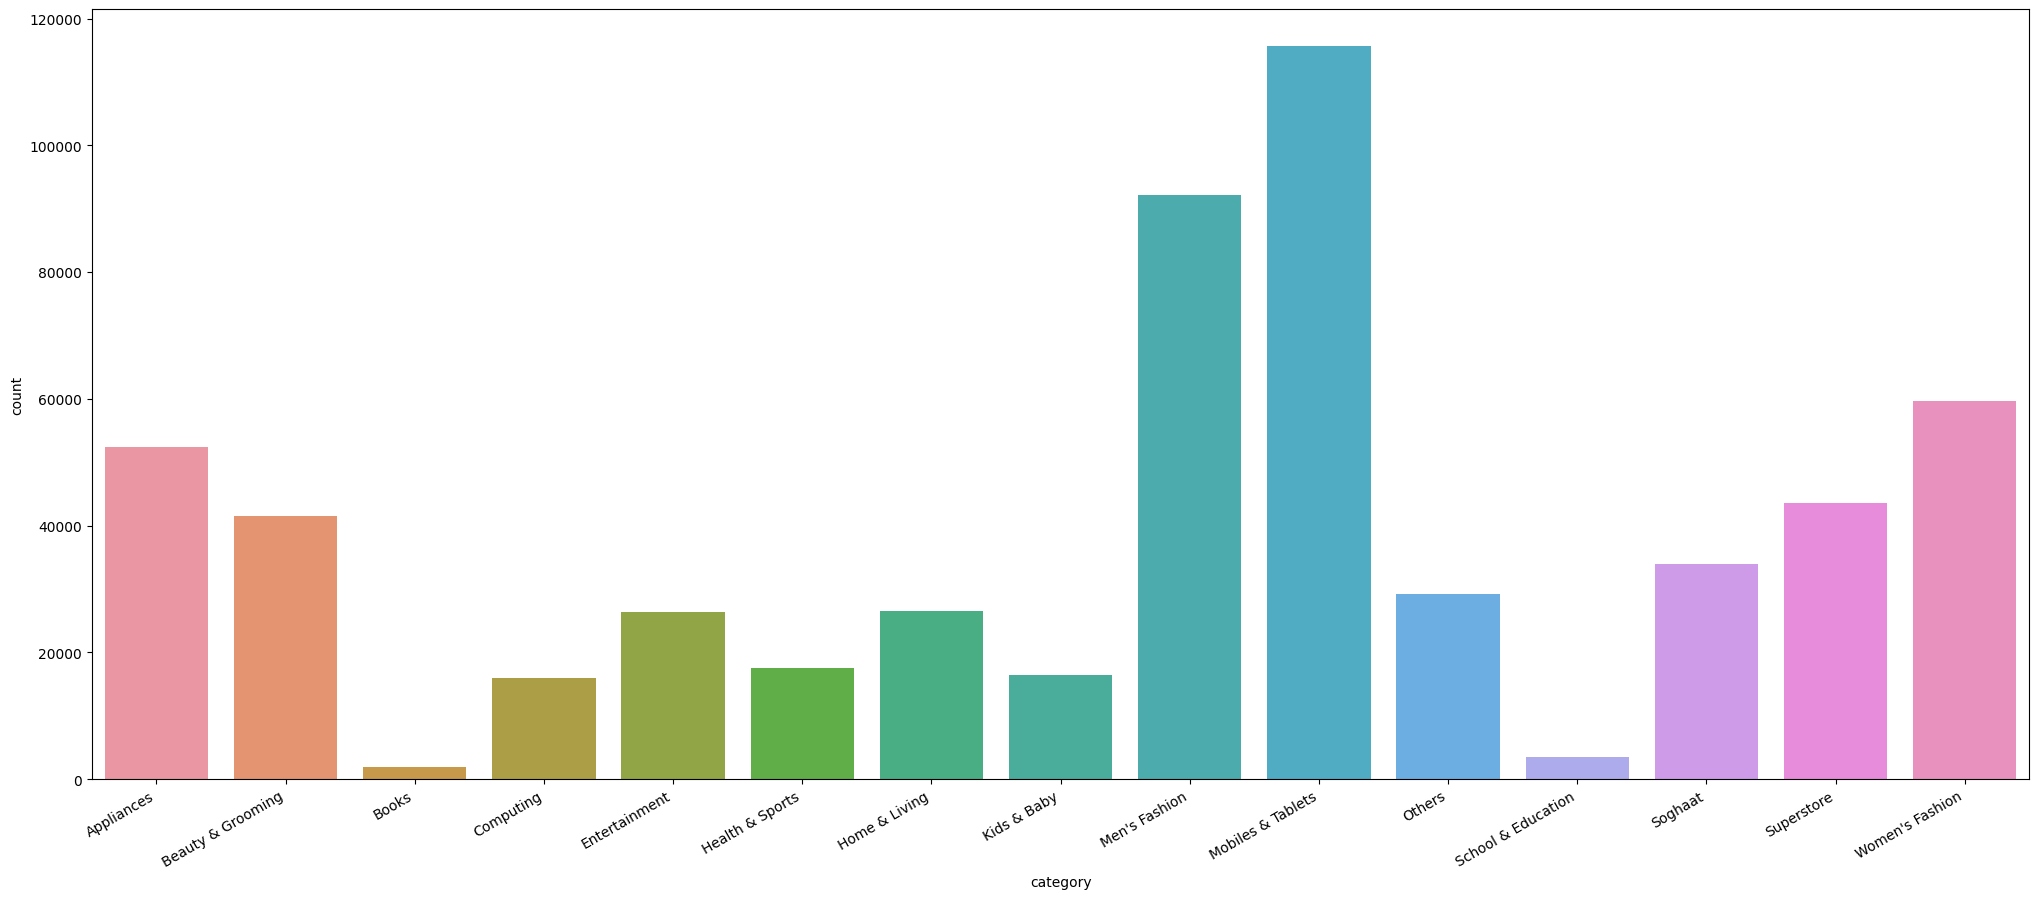

In [36]:
# Convert 'category' column to categorical data type
df['category'] = df['category'].astype('category')

# Create the countplot
chart = sns.countplot(data=df, x='category')

# Rotate the x-axis labels for better readability
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig('category.png')
plt.show()

Which month earning was maximum?

In [31]:
import pandas as pd

# Calculate sales by multiplying 'qty_ordered' and 'price'
df['sales'] = df['qty_ordered'] * df['price']

# Group by the 'month' column and sum the 'sales' column
results = df.groupby('month')['sales'].sum().reset_index()

print(results)


    month         sales
0     1.0  1.704661e+08
1     2.0  3.711247e+08
2     3.0  4.957593e+08
3     4.0  2.040885e+08
4     5.0  6.139261e+08
5     6.0  3.265754e+08
6     7.0  2.982263e+08
7     8.0  2.587015e+08
8     9.0  1.253724e+08
9    10.0  1.752446e+08
10   11.0  9.834658e+08
11   12.0  1.380596e+08


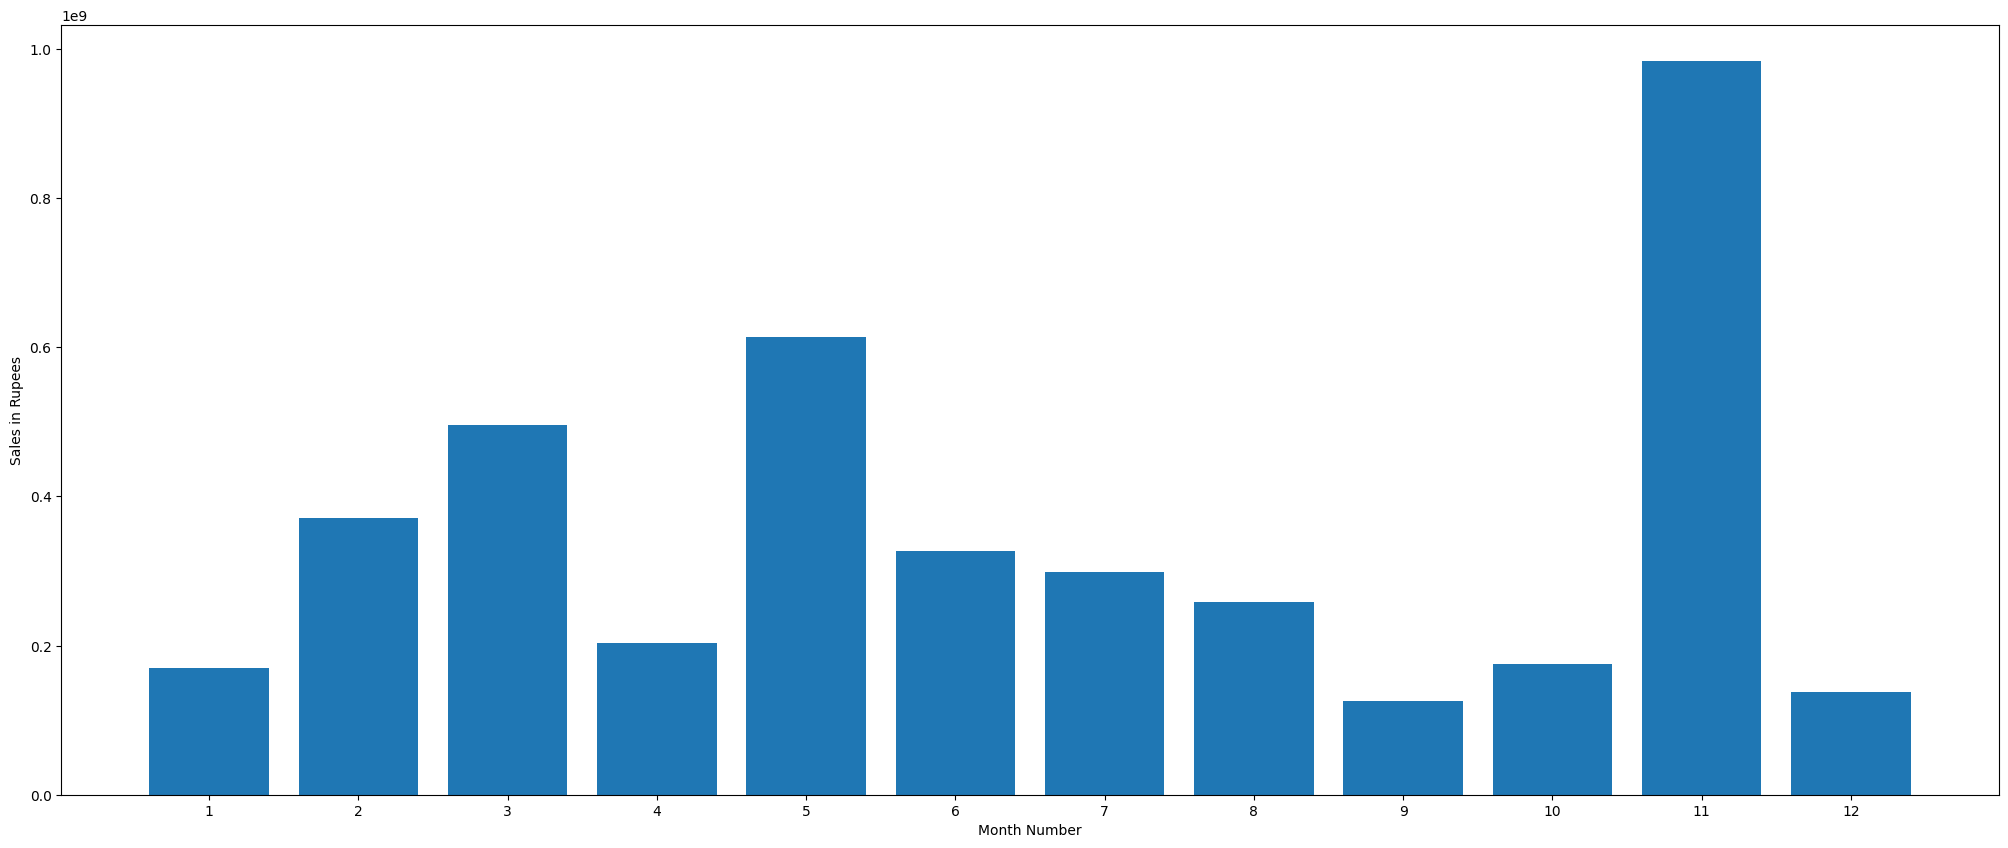

In [33]:
months = range(1,13) # 13 is excluded

plt.bar(months, results['sales']) # months on y-axis and results on x-axis
plt.xticks(months)  # ticks are showing here
plt.ylabel('Sales in Rupees')
plt.xlabel('Month Number')
plt.savefig('max_earning_month.png')
plt.show()

Which product generates more income?

C:\Users\tafre\AppData\Local\Temp\ipykernel_9488\811925867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat=df[["category", "grand_total"]].groupby(['category'], as_index=False).sum().sort_values(by='grand_total', ascending=False)
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

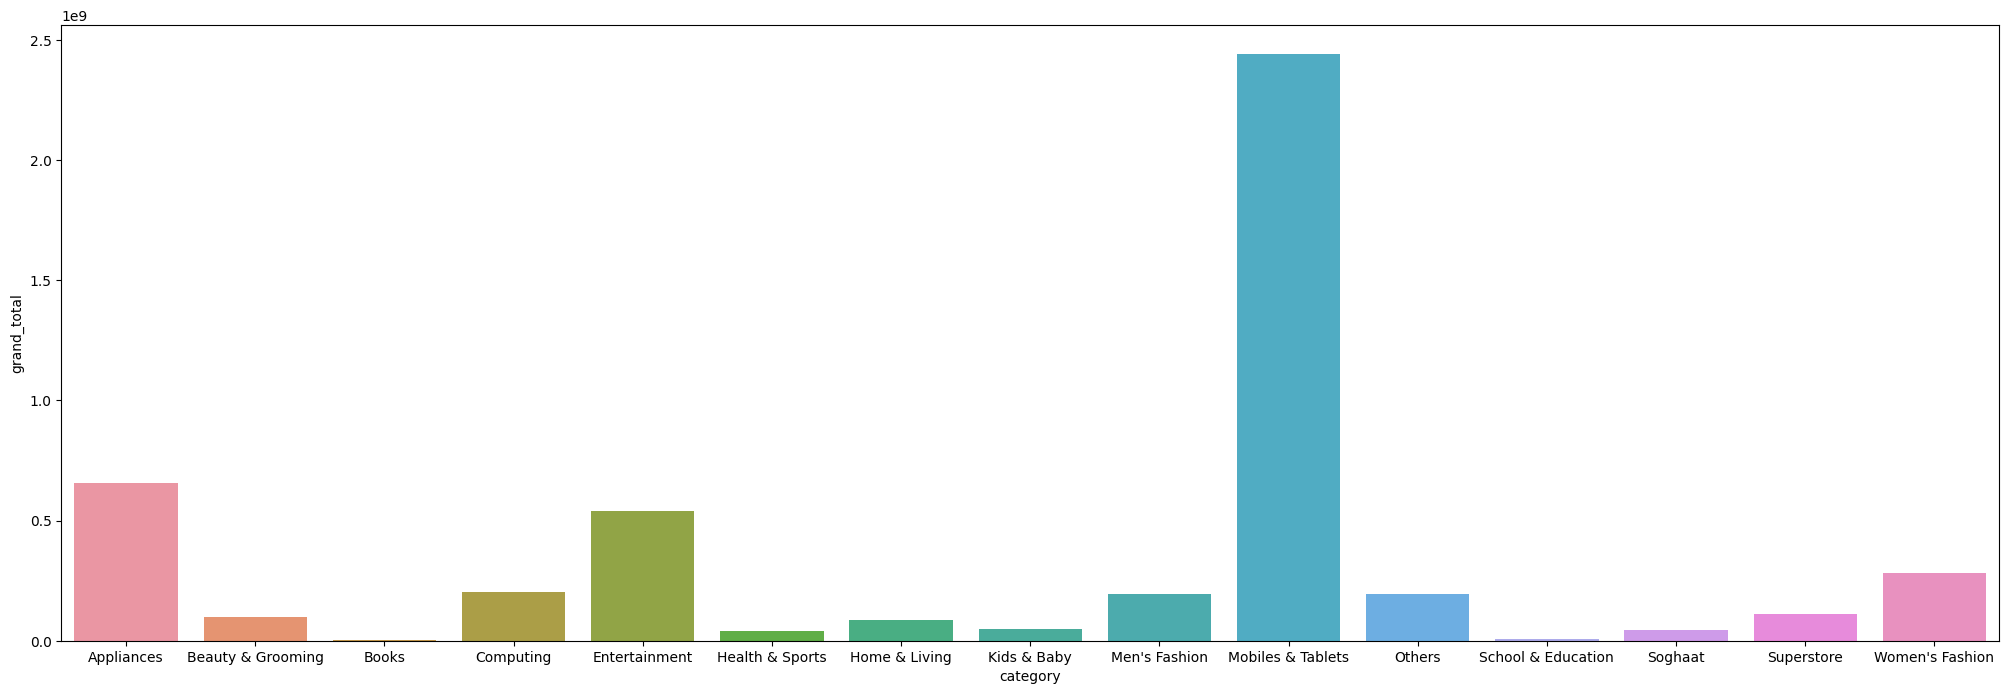

In [37]:
cat=df[["category", "grand_total"]].groupby(['category'], as_index=False).sum().sort_values(by='grand_total', ascending=False)

plt.figure(figsize=(25,8))

sns.barplot(x='category', y='grand_total', data=cat)

plt.savefig('max_income.png')
plt.show()

Visualizing payment method and order status frequency

In [88]:
pd.crosstab(df.category, df.status)

status,canceled,complete,order_refunded
category,,,
Appliances,21720,25461,5232
Beauty & Grooming,9743,27437,4313
Books,280,1340,250
Computing,6827,7244,1862
Entertainment,12586,11499,2240
Health & Sports,3397,11647,2458
Home & Living,7214,16228,3062
Kids & Baby,4086,10213,2190
Men's Fashion,22089,53214,16915


C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


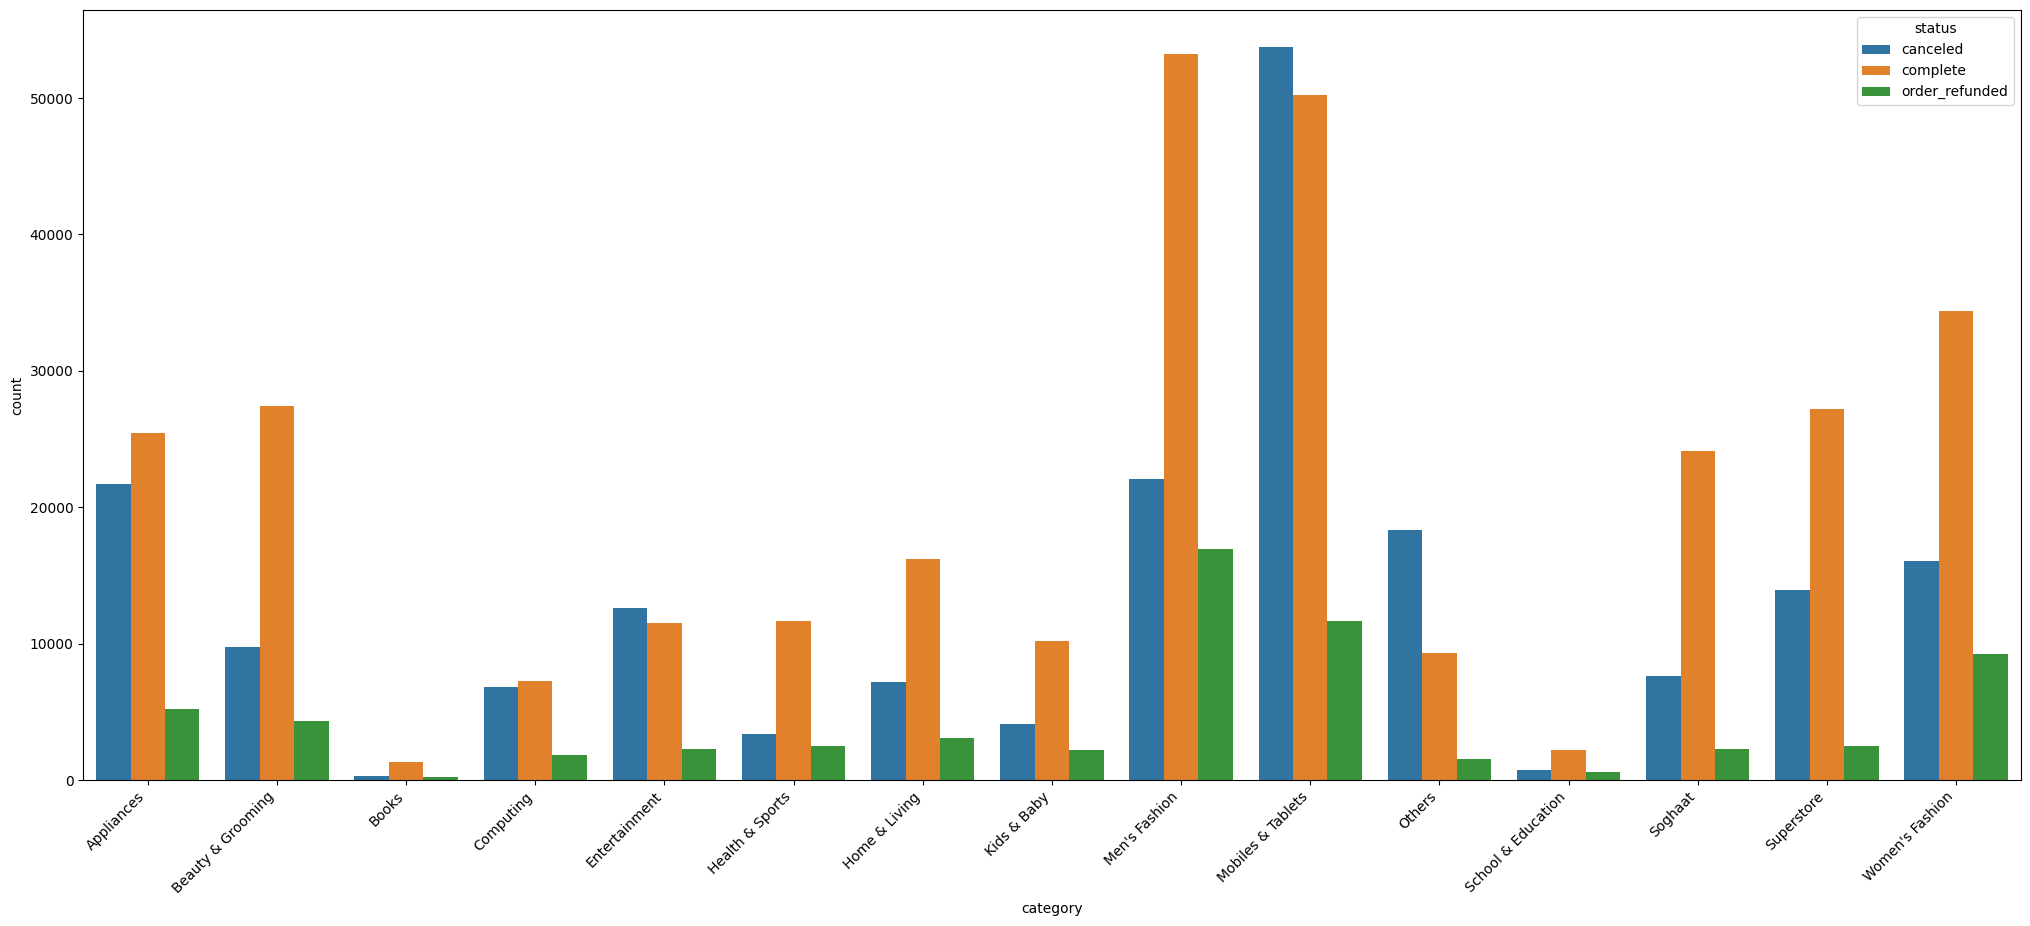

In [90]:
ax = sns.countplot(x="category", hue="status", data=df)
ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [91]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [92]:
X = df.drop('price',axis=1)
y = df['price']

In [93]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

,Feature,Variance
6,status,0.466952
9,year,0.539986
7,payment_method,5.455062
8,month,12.000000
5,category,15.000000
3,qty_ordered,70.109229
2,created_at,789.000000
10,sales,10789.000000
4,grand_total,36757.000000
1,customer_id,114214.000000


### Kbest for classification problem

Feature 0 : 35.521
Feature 1 : 26.284
Feature 2 : 35.529
Feature 3 : 2460.946
Feature 4 : 136.611
Feature 5 : 37.359
Feature 6 : 16.086
Feature 7 : 27.504
Feature 8 : 25.497
Feature 9 : 39.092
Feature 10 : 2053.722



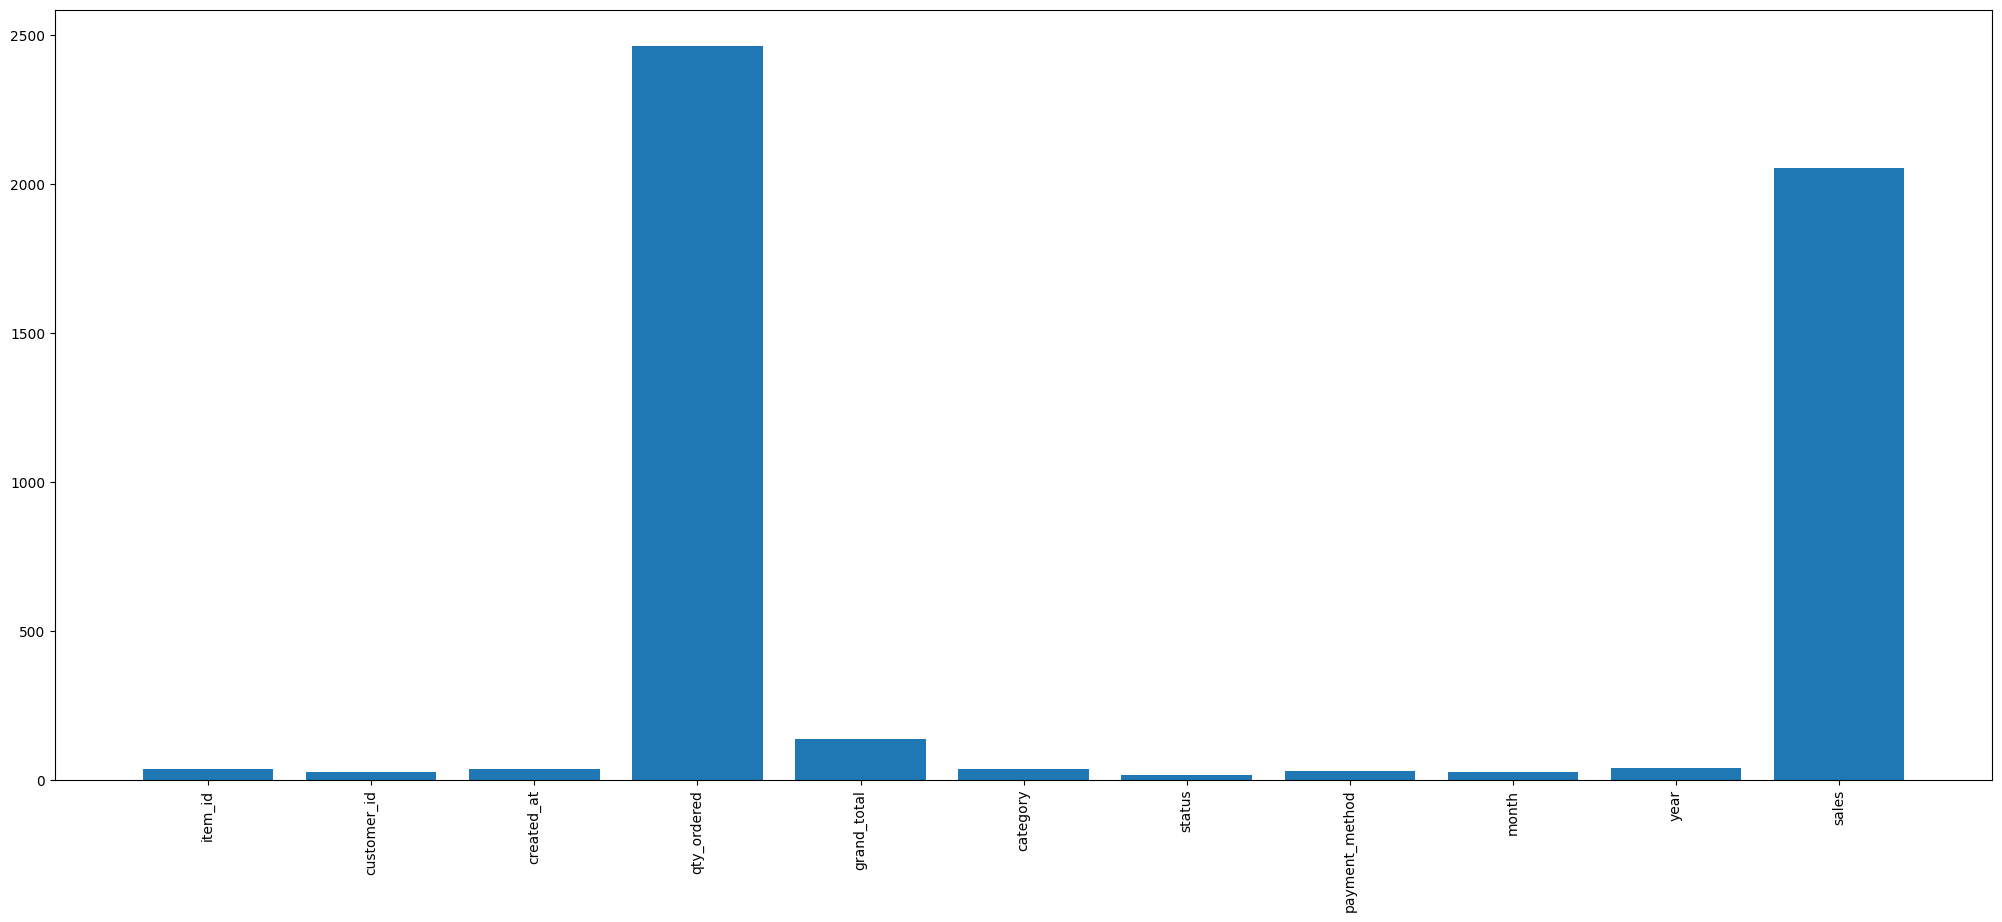

In [94]:
from sklearn.feature_selection import SelectKBest,f_classif

Kbest_classif = SelectKBest(score_func=f_classif, k=6)   # score_func=f_regression, ,, for regreassion problem 
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

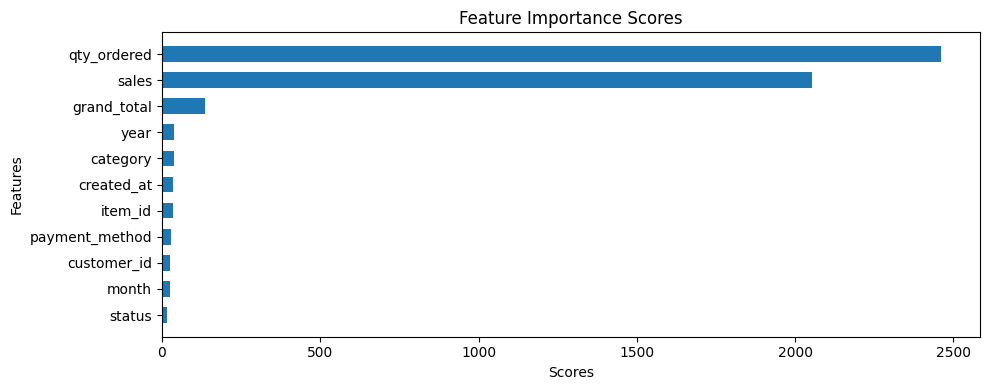

In [95]:
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))],Kbest_classif.scores_)),key=lambda x:x[1])

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
bar_width = 0.6  # Adjust this value to control the width of the bars
plt.barh(features, scores, height=bar_width, align='center')  # Use barh for horizontal bars
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.tight_layout()  # This ensures that labels and ticks fit within the figure
plt.savefig('feature_importance_plot.png')
plt.show()


In [96]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (409031, 11)

X_train_selected.shape: (409031, 6)



Feature 0 : 1.819
Feature 1 : 0.166
Feature 2 : 1.475
Feature 3 : 5.693
Feature 4 : 0.085
Feature 5 : 3.38
Feature 6 : 1.819
Feature 7 : 1.341
Feature 8 : 0.572
Feature 9 : 1.663
Feature 10 : 0.44
Feature 11 : 0.17
Feature 12 : 6.461
Feature 13 : 0.446
Feature 14 : 0.683
Feature 15 : 0.565
Feature 16 : 1.002
Feature 17 : 0.363
Feature 18 : 1.533



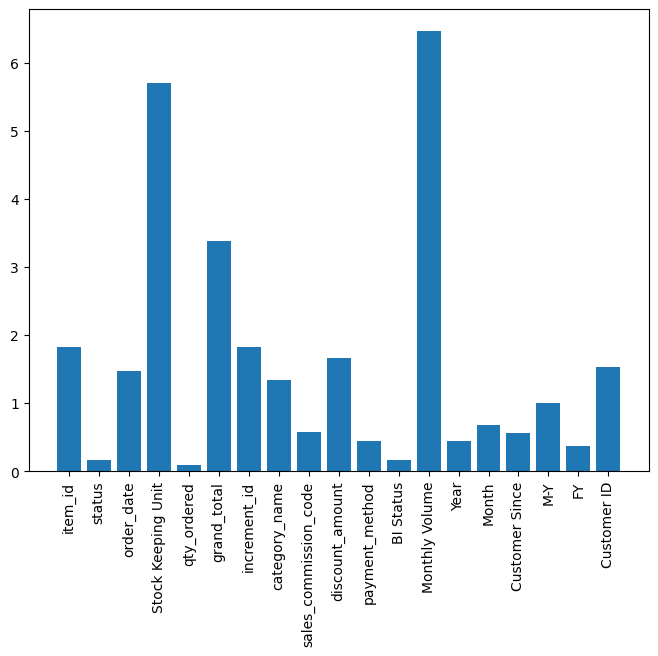

In [ ]:
from sklearn.feature_selection import mutual_info_classif

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=10)

infogain_classif.fit(X_train, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
# Assuming your original dataset is stored in a DataFrame called 'df'

# Select a random sample of rows
sample_size = 10000  # Adjust this to the desired number of rows
smaller_df = df.sample(n=sample_size, random_state=42)  # You can change the random_state for reproducibility

X = smaller_df.drop('price',axis=1)
y = smaller_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1


,Feature,Variance
17,FY,0.259854
13,Year,0.284286
11,BI Status,0.530498
4,qty_ordered,1.398521
14,Month,10.635910
1,status,10.740488
10,payment_method,11.053670
7,category_name,15.000000
16,M-Y,25.000000
15,Customer Since,25.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

#In this example, by using only 6 features of the dataset, we got not better score than by using whole features.

C:\Users\tafre\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score with all features: 0.117


ValueError: Found input variables with inconsistent numbers of samples: [313125, 7000]

In [ ]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
percentile.get_support()

array([ True, False,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
       False])

In [ ]:
X_train.columns

Index(['item_id', 'status', 'order_date', 'Stock Keeping Unit', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name', 'sales_commission_code',
       'discount_amount', 'payment_method', 'BI Status', 'Monthly Volume',
       'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [ ]:
df_corr = pd.DataFrame(df.corrwith(df['price']),columns='correlation'.split(','))